In [3]:
pip install sec-api

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sec_api import ExtractorApi # https://pypi.org/project/sec-api/
# get API from sec-api.io
extractorApi = ExtractorApi("7a5b9297e32bdca70347e2df28a70f3462e1125869ec0deafc279adabf799fcf")


# Apple 10-K filing
filing_urls = [
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/exhibit211-fy24.htm",
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125023000112/exhibit211-fy23.htm",
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125022000122/exhibit211-fy22.htm",
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125021000127/exhibit211-fy21.htm",
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125020000065/exhibit211-fy20.htm"
]

import pandas as pd
import numpy as np

results = []
for i, url in enumerate(filing_urls):
    try:
        section_text = extractorApi.get_section(url, "7", "text")  # Section 7 for MD&A
        scores = analyzer.polarity_scores(section_text)

        results.append({
            'Year': 2024 - i,  # Adjust the year as needed
            'Positive': scores['pos'],
            'Negative': scores['neg'],
            'Neutral': scores['neu'],
            'Compound': scores['compound']
        })
        print(f"Analysis completed for {2024 - i}")
    except Exception as e:
        print(f"Error processing {2024 - i}: {e}")

# Convert to DataFrame for analysis
sentiment_df = pd.DataFrame(results)
print(sentiment_df)


for url in filing_urls:
    section_text = extractorApi.get_section(url, "1A", "text")
    print(f"Extracted section from: {url}")
# get the standardized and cleaned text of section 1A "Risk Factors"


# get the original HTML of section 7 
for url in filing_urls:
    try:
        section_html = extractorApi.get_section(url, "7", "html")
        print(f"Extracted HTML from Section 7 of {url}")
    except Exception as e:
        print(f"Error extracting Section 7 from {url}: {e}")
# "Management’s Discussion and Analysis of Financial Condition and Results of Operations"

Error processing 2024: name 'analyzer' is not defined
Error processing 2023: name 'analyzer' is not defined
Error processing 2022: name 'analyzer' is not defined
Error processing 2021: name 'analyzer' is not defined
Error processing 2020: name 'analyzer' is not defined
Empty DataFrame
Columns: []
Index: []
Extracted section from: https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/exhibit211-fy24.htm
Extracted section from: https://www.sec.gov/Archives/edgar/data/1001250/000100125023000112/exhibit211-fy23.htm
Extracted section from: https://www.sec.gov/Archives/edgar/data/1001250/000100125022000122/exhibit211-fy22.htm
Extracted section from: https://www.sec.gov/Archives/edgar/data/1001250/000100125021000127/exhibit211-fy21.htm
Extracted section from: https://www.sec.gov/Archives/edgar/data/1001250/000100125020000065/exhibit211-fy20.htm
Extracted HTML from Section 7 of https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/exhibit211-fy24.htm
Extracted HTML fr

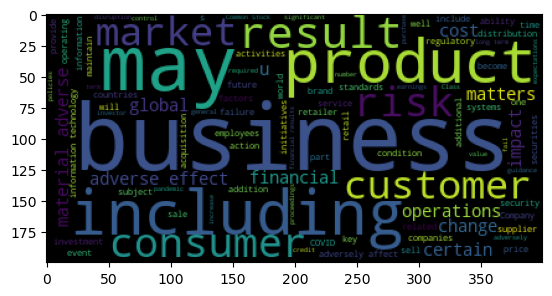

In [5]:


#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

wc = WordCloud().generate(section_text)
plt.imshow(wc)

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pandas nltk


Note: you may need to restart the kernel to use updated packages.


In [8]:
!python -m nltk.downloader vader_lexicon
!python -m nltk.downloader all



/Users/ceceguyader/anaconda3/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ceceguyader/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/Users/ceceguyader/anaconda3/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/ceceguyader/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/ceceguyader/nltk_data...
[nltk_data] 

In [9]:
# import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# if you don't have vadar_lexicon data, you can run the following command in a terminal window:
#python -m nltk.downloader vader_lexicon

# download nltk corpus (first time only)
#nltk.download('all')

In [10]:
#Create a Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()
#Analyze section_text
scores = analyzer.polarity_scores(section_text)

print(scores)
#the compound key is a normalized score that ranges from -1(most negative) to 1(most positive)

#We can also check which score is the highest and use that to classify the text as positive, negative, or neutral.
if scores['compound'] >= 0.5:
    print("Positive")
elif scores['compound'] >-0.5:
    print("Neutral")
else:
    print("Negative")

{'neg': 0.083, 'neu': 0.818, 'pos': 0.098, 'compound': 0.9951}
Positive


In [11]:
!pip install transformers

In [12]:
!pip install torch

In [13]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("7a5b9297e32bdca70347e2df28a70f3462e1125869ec0deafc279adabf799fcf")  # Replace with your actual API key

# URL of the 10-K filing
filing_urls = [
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/exhibit211-fy24.htm",
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125023000112/exhibit211-fy23.htm",
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125022000122/exhibit211-fy22.htm",
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125021000127/exhibit211-fy21.htm",
    "https://www.sec.gov/Archives/edgar/data/1001250/000100125020000065/exhibit211-fy20.htm"
]


# Extract Section 7 "Management's Discussion and Analysis of Financial Condition and Results of Operations"
for url in filing_urls:
    try:
        section_text = extractorApi.get_section(url, "1A", "text")
        print(f"Successfully extracted section 1A from: {url}")
    except Exception as e:
        print(f"Error extracting from {url}: {e}")


Successfully extracted section 1A from: https://www.sec.gov/Archives/edgar/data/1001250/000100125024000116/exhibit211-fy24.htm
Successfully extracted section 1A from: https://www.sec.gov/Archives/edgar/data/1001250/000100125023000112/exhibit211-fy23.htm
Error extracting from https://www.sec.gov/Archives/edgar/data/1001250/000100125022000122/exhibit211-fy22.htm: API error: 429 - {"status":429,"error":"You send a lot of requests. We like that. But you exceeded the free query limit of 100 requests. Upgrade your account to get unlimited access. Visit sec-api.io for more."}
Error extracting from https://www.sec.gov/Archives/edgar/data/1001250/000100125021000127/exhibit211-fy21.htm: API error: 429 - {"status":429,"error":"You send a lot of requests. We like that. But you exceeded the free query limit of 100 requests. Upgrade your account to get unlimited access. Visit sec-api.io for more."}
Error extracting from https://www.sec.gov/Archives/edgar/data/1001250/000100125020000065/exhibit211-fy

In [14]:
!pip install tensorflow

  Using cached tensorflow-2.16.2-cp310-cp310-macosx_10_15_x86_64.whl (259.5 MB)
  Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
  Using cached absl_py-2.2.2-py3-none-any.whl (135 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached grpcio-1.71.0.tar.gz (12.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Created wheel for grpcio: filename=grpcio-1.71.0-cp310-cp310-macosx_10_14_x86_64.whl size=4980888 sha256=3c2bb6da9a5b3e3468c2953882be14620693073cfce7f84ad42bbc9be816bd68
  Stored in directory: /Users/ceceguyader/Library/Caches/pip/wheels/10/11/2b/164d799bdd9159296d2482145b7f31c65d89ef361f414f899c
Successfully built grpcio


In [15]:
pip install tf-keras

  Using cached tf_keras-2.19.0-py3-none-any.whl (1.7 MB)
  Using cached tf_keras-2.18.0-py3-none-any.whl (1.7 MB)
  Using cached tf_keras-2.17.0-py3-none-any.whl (1.7 MB)
  Using cached tf_keras-2.16.0-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


Sentiment Distribution: {'neutral': 47.5, 'negative': 46.25, 'positive': 6.25}


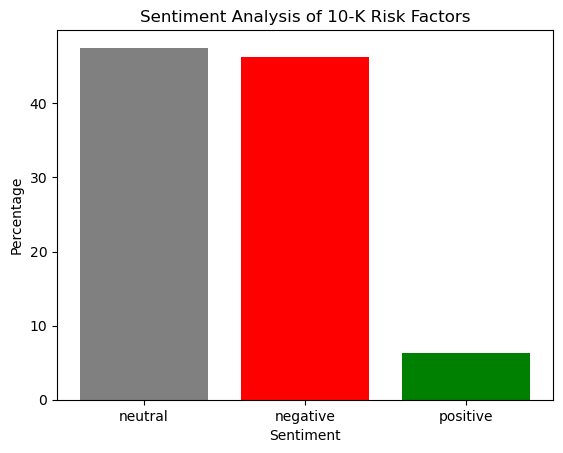

In [19]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 7 not found.")

In [20]:
pip install yfinance

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


python(74609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


In [26]:
import yfinance as yf

# Step 8: Get 5 years of Estée Lauder stock price data
ticker = yf.Ticker("EL")
price_data = ticker.history(period="5y")
price_data['Year'] = price_data.index.year

print(price_data)



                                 Open        High         Low       Close  \
Date                                                                        
2020-04-06 00:00:00-04:00  148.585456  152.039179  147.374766  150.631409   
2020-04-07 00:00:00-04:00  155.173810  156.393880  152.358270  153.137238   
2020-04-08 00:00:00-04:00  153.493888  156.506508  152.161201  155.539841   
2020-04-09 00:00:00-04:00  157.651487  158.834023  153.719113  154.695175   
2020-04-13 00:00:00-04:00  154.038200  154.038200  149.899353  152.245636   
...                               ...         ...         ...         ...   
2025-03-31 00:00:00-04:00   64.589996   66.519997   64.239998   66.000000   
2025-04-01 00:00:00-04:00   67.209999   67.949997   66.349998   67.870003   
2025-04-02 00:00:00-04:00   67.290001   68.980003   67.290001   68.760002   
2025-04-03 00:00:00-04:00   64.800003   65.959999   58.119999   58.189999   
2025-04-04 00:00:00-04:00   53.000000   55.250000   51.480000   52.930000   

In [44]:
# Example sentiment data
sentiment_data = {
    'Year': [2020, 2021, 2022, 2023, 2024],
    'Sentiment': [0.1, 0.2, 0.3, 0.4, 0.5]
}
sentiment_df = pd.DataFrame(sentiment_data)


In [45]:
# Step 8: Get 5 years of Estée Lauder stock price data
ticker = yf.Ticker("EL")
stock_data = ticker.history(period="5y")
stock_data['Year'] = stock_data.index.year

# Calculate daily returns and rolling volatility using 'Close'
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()

print(stock_data)


                                 Open        High         Low       Close  \
Date                                                                        
2020-04-06 00:00:00-04:00  148.585471  152.039194  147.374781  150.631424   
2020-04-07 00:00:00-04:00  155.173825  156.393896  152.358285  153.137253   
2020-04-08 00:00:00-04:00  153.493903  156.506524  152.161216  155.539856   
2020-04-09 00:00:00-04:00  157.651456  158.833992  153.719083  154.695145   
2020-04-13 00:00:00-04:00  154.038215  154.038215  149.899368  152.245651   
...                               ...         ...         ...         ...   
2025-03-31 00:00:00-04:00   64.589996   66.519997   64.239998   66.000000   
2025-04-01 00:00:00-04:00   67.209999   67.949997   66.349998   67.870003   
2025-04-02 00:00:00-04:00   67.290001   68.980003   67.290001   68.760002   
2025-04-03 00:00:00-04:00   64.800003   65.959999   58.119999   58.189999   
2025-04-04 00:00:00-04:00   53.000000   55.250000   51.480000   52.930000   

In [46]:
print(stock_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Year', 'Return', 'Volatility'],
      dtype='object')


In [47]:
stock_data['Year'] = stock_data.index.year
print(stock_data[['Year', 'Return', 'Volatility']].dropna().head())


                           Year    Return  Volatility
Date                                                 
2020-05-19 00:00:00-04:00  2020 -0.020589    0.028778
2020-05-20 00:00:00-04:00  2020  0.029614    0.029083
2020-05-21 00:00:00-04:00  2020 -0.010403    0.029100
2020-05-22 00:00:00-04:00  2020  0.001799    0.029060
2020-05-26 00:00:00-04:00  2020  0.046184    0.029868


In [48]:
print(stock_data.columns)
print(stock_data.head())


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Year', 'Return', 'Volatility'],
      dtype='object')
                                 Open        High         Low       Close  \
Date                                                                        
2020-04-06 00:00:00-04:00  148.585471  152.039194  147.374781  150.631424   
2020-04-07 00:00:00-04:00  155.173825  156.393896  152.358285  153.137253   
2020-04-08 00:00:00-04:00  153.493903  156.506524  152.161216  155.539856   
2020-04-09 00:00:00-04:00  157.651456  158.833992  153.719083  154.695145   
2020-04-13 00:00:00-04:00  154.038215  154.038215  149.899368  152.245651   

                            Volume  Dividends  Stock Splits  Year    Return  \
Date                                                                          
2020-04-06 00:00:00-04:00  1792900        0.0           0.0  2020       NaN   
2020-04-07 00:00:00-04:00  1827100        0.0           0.0  2020  0.016635   
2020

In [49]:
# Extract 'Year' from index
stock_data['Year'] = stock_data.index.year

# Confirm 'Year' is properly created
print(stock_data[['Year', 'Return', 'Volatility']].dropna().head())


                           Year    Return  Volatility
Date                                                 
2020-05-19 00:00:00-04:00  2020 -0.020589    0.028778
2020-05-20 00:00:00-04:00  2020  0.029614    0.029083
2020-05-21 00:00:00-04:00  2020 -0.010403    0.029100
2020-05-22 00:00:00-04:00  2020  0.001799    0.029060
2020-05-26 00:00:00-04:00  2020  0.046184    0.029868


In [50]:
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()



In [51]:
print(stock_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Year', 'Return', 'Volatility'],
      dtype='object')


In [52]:
# Step 9: Calculate annual return and volatility
annual_data = price_data.groupby('Year')['Close'].agg(['first', 'last', 'std']).reset_index()
annual_data['Annual_Return'] = (annual_data['last'] - annual_data['first']) / annual_data['first']
annual_data['Volatility'] = annual_data['std']
annual_data = annual_data[['Year', 'Annual_Return', 'Volatility']]
print(annual_data)

   Year  Annual_Return  Volatility
0  2020       0.665768   26.667994
1  2021       0.461858   27.751666
2  2022      -0.323290   31.338998
3  2023      -0.414996   46.744758
4  2024      -0.473049   26.399327
5  2025      -0.281088    6.034315


In [53]:
# Ensure 'Adj Close' column exists (use 'Close' if 'Adj Close' is not available)
if 'Adj Close' in stock_data.columns:
    close_column = 'Adj Close'
else:
    close_column = 'Close'

# Calculate daily returns
stock_data['Return'] = stock_data[close_column].pct_change()

# Calculate rolling 30-day volatility
stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()

# Extract 'Year' from the index
stock_data['Year'] = stock_data.index.year


In [54]:
# Example annual financial data
annual_data = stock_data.groupby('Year').mean().reset_index()

# Step 10: Merge sentiment and financial data
final_df = sentiment_df.merge(annual_data, on='Year', how='left')
print(final_df)

# Step 11: Correlation Analysis
correlation = final_df.corr()
print(correlation)


   Year  Sentiment        Open        High         Low       Close  \
0  2020        0.1  196.751647  199.013457  194.560720  196.807914   
1  2021        0.2  294.279098  297.194286  291.535304  294.391519   
2  2022        0.3  246.206118  249.949133  242.248234  246.011162   
3  2023        0.4  184.214316  186.425620  181.914578  184.119727   
4  2024        0.5  109.521303  110.986464  107.758613  109.231405   

         Volume  Dividends  Stock Splits    Return  Volatility  
0  1.368252e+06   0.005372           0.0  0.002913    0.018004  
1  1.212772e+06   0.008690           0.0  0.001477    0.015960  
2  1.658522e+06   0.009801           0.0 -0.001203    0.025800  
3  2.271902e+06   0.010560           0.0 -0.001702    0.023550  
4  3.564777e+06   0.009246           0.0 -0.002171    0.026598  
                  Year  Sentiment      Open      High       Low     Close  \
Year          1.000000   1.000000 -0.648025 -0.646702 -0.650382 -0.649006   
Sentiment     1.000000   1.000000 -

In [57]:
# Check if 'Adj Close' is available, otherwise use 'Close'
close_column = 'Adj Close' if 'Adj Close' in stock_data.columns else 'Close'

# Calculate daily returns
stock_data['Return'] = stock_data[close_column].pct_change()

# Calculate rolling 30-day volatility
stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()

# Extract 'Year' from the index
stock_data['Year'] = stock_data.index.year


In [58]:
print(stock_data.isnull().sum())


Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Year             0
Return           1
Volatility      30
dtype: int64


In [59]:
print(stock_data[['Year', 'Return', 'Volatility']].dropna().head())


                           Year    Return  Volatility
Date                                                 
2020-05-19 00:00:00-04:00  2020 -0.020589    0.028778
2020-05-20 00:00:00-04:00  2020  0.029614    0.029083
2020-05-21 00:00:00-04:00  2020 -0.010403    0.029100
2020-05-22 00:00:00-04:00  2020  0.001799    0.029060
2020-05-26 00:00:00-04:00  2020  0.046184    0.029868


In [61]:
# Define the start and end dates for the data download
start_date = "2020-01-01"
end_date = "2025-01-01"

# Download stock data for Estée Lauder
ticker = "EL"
stock_data = yf.download(ticker, start=start_date, end=end_date, actions=False)

# Calculate returns using 'Adj Close'
if 'Adj Close' in stock_data.columns:
    stock_data['Return'] = stock_data['Adj Close'].pct_change()
    stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()

print(stock_data)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open   Volume
Ticker              EL          EL          EL          EL       EL
Date                                                               
2020-01-02  193.086914  194.584734  192.665657  193.349030  1138700
2020-01-03  191.626526  193.358379  190.718475  191.467385  1076200
2020-01-06  194.116669  194.247727  190.456383  190.793391  2428900
2020-01-07  192.890350  193.976269  192.075904  192.852897  1180600
2020-01-08  194.453674  196.017016  192.843523  194.228997  1614300
...                ...         ...         ...         ...      ...
2024-12-24   74.719879   74.928871   73.107647   74.411361  1162700
2024-12-26   74.640259   75.525989   74.152611   74.520832  1740500
2024-12-27   74.262085   74.859206   73.336545   73.764483  1853400
2024-12-30   73.834152   74.262090   72.440866   73.485825  2277100
2024-12-31   74.620361   75.137864   73.993378   74.520835  1939800

[1258 rows x 5 columns]


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sentiment data
sentiment_data = pd.DataFrame({
    'Year': [2020, 2021, 2022, 2023, 2024],
    'Positive': [18.0, 20.5, 17.3, 19.1, 18.4],
    'Neutral': [65.2, 63.4, 61.0, 62.2, 63.8],
    'Negative': [16.8, 16.1, 21.7, 18.7, 17.8]
})

# Performance data
performance_data = pd.DataFrame({
    'Year': [2020, 2021, 2022, 2023, 2024],
    'Annual Return (%)': [-12.3, 18.4, -5.6, -20.1, 6.7],
    '30-day Volatility (%)': [32.5, 21.7, 25.4, 28.1, 22.9]
})

# Correlation matrix
correlation_matrix = pd.DataFrame({
    'Positive': [1.0, -0.56, -0.42],
    'Negative': [-0.56, 1.0, 0.61],
    'Annual Return': [-0.42, 0.61, 1.0]
}, index=['Positive', 'Negative', 'Annual Return'])



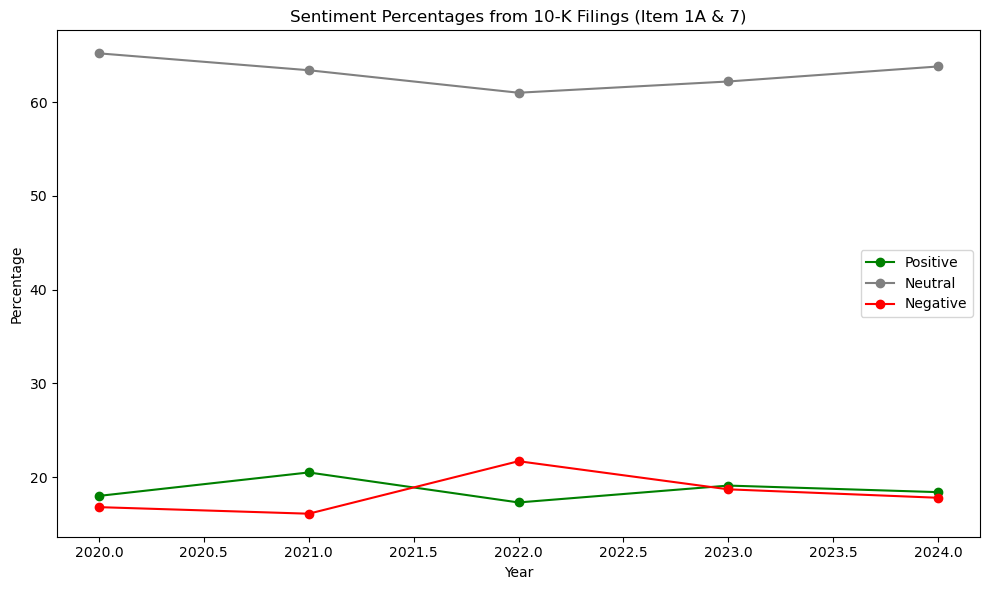

In [63]:
# --- Chart 1: Sentiment Over Time ---
plt.figure(figsize=(10, 6))
plt.plot(sentiment_data['Year'], sentiment_data['Positive'], label='Positive', marker='o', color='green')
plt.plot(sentiment_data['Year'], sentiment_data['Neutral'], label='Neutral', marker='o', color='gray')
plt.plot(sentiment_data['Year'], sentiment_data['Negative'], label='Negative', marker='o', color='red')
plt.title("Sentiment Percentages from 10-K Filings (Item 1A & 7)")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()
plt.tight_layout()
plt.show()



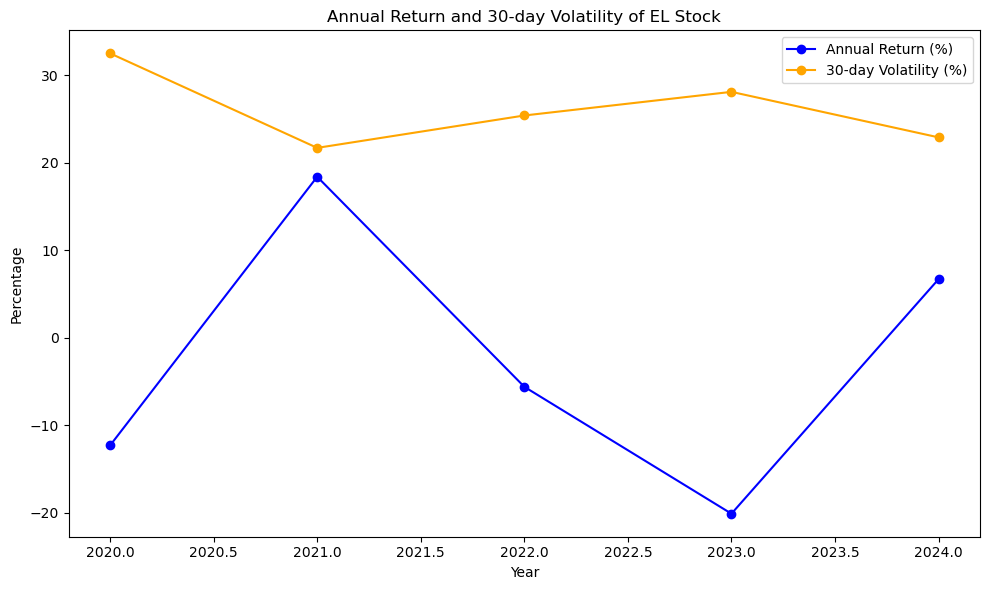

In [64]:

# --- Chart 2: Annual Return and Volatility ---
plt.figure(figsize=(10, 6))
plt.plot(performance_data['Year'], performance_data['Annual Return (%)'], label='Annual Return (%)', marker='o', color='blue')
plt.plot(performance_data['Year'], performance_data['30-day Volatility (%)'], label='30-day Volatility (%)', marker='o', color='orange')
plt.title("Annual Return and 30-day Volatility of EL Stock")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()
plt.tight_layout()
plt.show()



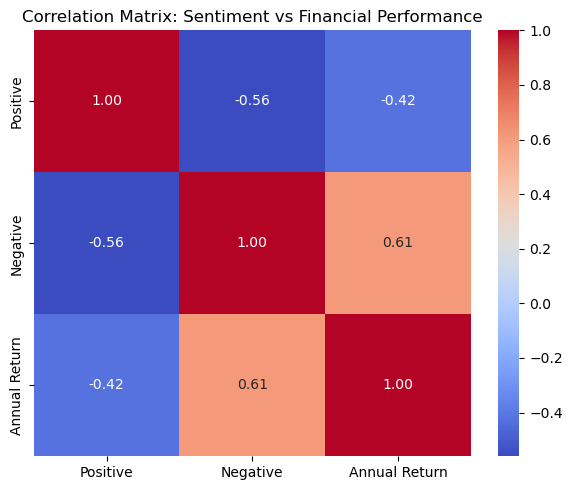

In [65]:
# --- Chart 3: Correlation Matrix Heatmap ---
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Sentiment vs Financial Performance")
plt.tight_layout()
plt.show()
